GitHub Link: https://github.com/Cnappi1/Comp3800_Fall2024.git

Link to Data: https://www.kaggle.com/datasets/ulrikthygepedersen/fastfood-nutrition

This data contains multiple fast food restaurants, and many of their menu items. The data set also includes the nutritional information of each item such as calories, fat sodium, carbs, and fiber.

Main Inquiry Question: How does the nutritional value of the food items at these fast food chains vary? Does a higher calorie content tend to mean higher or lower values in other nutrtional areas?

**Sub-questions: **

1.  How do calories, protein, and sodium vary on average amongst these fast-food chains?
2. Do menu items with higher protein content tend to have a lower or higher calorie content amongst these chains?
3.Are higher-calorie items generally associated with higher sodium levels?



In [2]:
#Imported Libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [3]:
#Imported file with data and loaded the dataframe
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fastfood.csv')

In [4]:
#Printing shape, data types, and first 10 rows of data.
print("shape", df.shape)
print(df.dtypes)
print(df.head(10))

shape (515, 17)
restaurant      object
item            object
calories         int64
cal_fat          int64
total_fat        int64
sat_fat        float64
trans_fat      float64
cholesterol      int64
sodium           int64
total_carb       int64
fiber          float64
sugar            int64
protein        float64
vit_a          float64
vit_c          float64
calcium        float64
salad           object
dtype: object
  restaurant                                       item  calories  cal_fat  \
0  Mcdonalds           Artisan Grilled Chicken Sandwich       380       60   
1  Mcdonalds             Single Bacon Smokehouse Burger       840      410   
2  Mcdonalds             Double Bacon Smokehouse Burger      1130      600   
3  Mcdonalds  Grilled Bacon Smokehouse Chicken Sandwich       750      280   
4  Mcdonalds   Crispy Bacon Smokehouse Chicken Sandwich       920      410   
5  Mcdonalds                                    Big Mac       540      250   
6  Mcdonalds                     

In [5]:
#Dropping unwanted features for this analysis and reprinting shape of data frame to check.
df = df.drop(['cal_fat','total_fat','sat_fat','trans_fat','cholesterol','total_carb','fiber','sugar','vit_a', 'vit_c', 'calcium', 'salad'], axis=1)
print("shape", df.shape)
print(df.dtypes)
print(df.head(10))

shape (515, 5)
restaurant     object
item           object
calories        int64
sodium          int64
protein       float64
dtype: object
  restaurant                                       item  calories  sodium  \
0  Mcdonalds           Artisan Grilled Chicken Sandwich       380    1110   
1  Mcdonalds             Single Bacon Smokehouse Burger       840    1580   
2  Mcdonalds             Double Bacon Smokehouse Burger      1130    1920   
3  Mcdonalds  Grilled Bacon Smokehouse Chicken Sandwich       750    1940   
4  Mcdonalds   Crispy Bacon Smokehouse Chicken Sandwich       920    1980   
5  Mcdonalds                                    Big Mac       540     950   
6  Mcdonalds                               Cheeseburger       300     680   
7  Mcdonalds                   Classic Chicken Sandwich       510    1040   
8  Mcdonalds                        Double Cheeseburger       430    1040   
9  Mcdonalds        Double Quarter Pounder® with Cheese       770    1290   

   protein  


In [6]:
#Checking Missing Data In Each Column
print(df.isnull().sum())

#Checking Percentage of Missing Data In Each Column
for cols in df.columns:
    pct_missing = (df[cols].isnull().sum()/df.shape[0])
    print(cols, round(pct_missing, 2))


restaurant    0
item          0
calories      0
sodium        0
protein       1
dtype: int64
restaurant 0.0
item 0.0
calories 0.0
sodium 0.0
protein 0.0


In [7]:
#Dropping rows where any value is null across columns.
print(df.shape)
df = df.dropna()
print(df.shape)

(515, 5)
(514, 5)


In [8]:
#Checking for and removing duplicates in the restaurant and item columns
df_deldup = df.drop_duplicates(subset = ['restaurant','item'], keep = 'last')
print(df.shape)
print(df_deldup.shape)

(514, 5)
(512, 5)


count     512.000000
mean      529.765625
std       281.529134
min        20.000000
25%       330.000000
50%       490.000000
75%       690.000000
max      2430.000000
Name: calories, dtype: float64


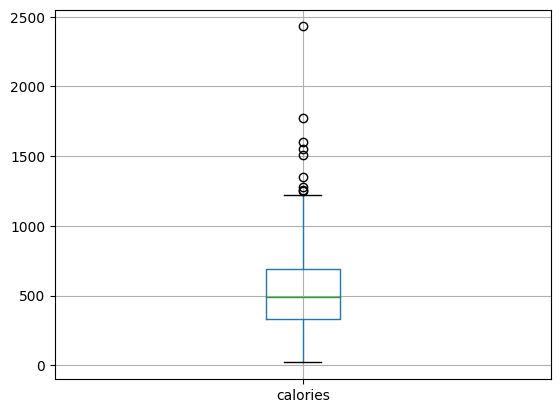

In [9]:
#Checking the column calories for outliers.
df_deldup.boxplot(column=['calories'])
print(df_deldup['calories'].describe())

count    512.000000
mean      27.923828
std       17.709331
min        1.000000
25%       15.750000
50%       25.000000
75%       36.000000
max      186.000000
Name: protein, dtype: float64


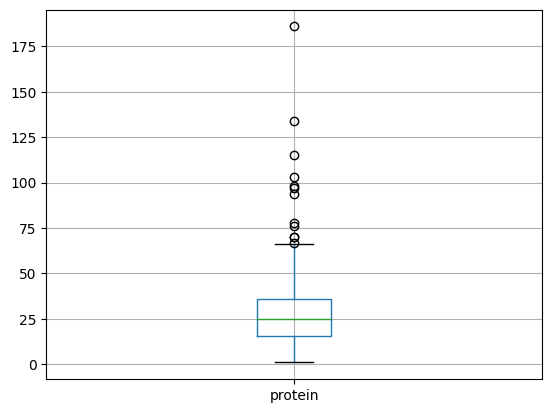

In [10]:
#Checking the column sodium for outliers.
df_deldup.boxplot(column=['protein'])
print(df_deldup['protein'].describe())

count     512.000000
mean     1245.742188
std       690.920099
min        15.000000
25%       800.000000
50%      1110.000000
75%      1550.000000
max      6080.000000
Name: sodium, dtype: float64


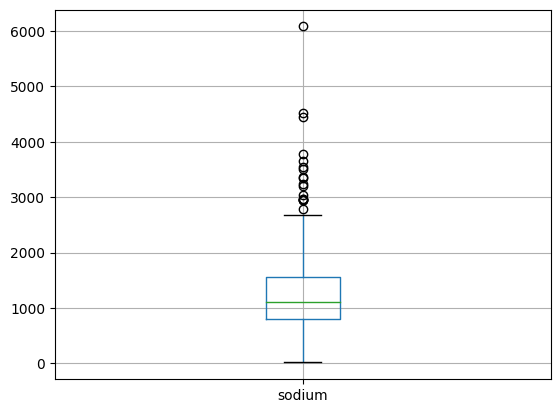

In [11]:
#Checking the column protein for outliers.
df_deldup.boxplot(column=['sodium'])
print(df_deldup['sodium'].describe())

In [12]:
#Dropping rows where the value of the calories column exceeds 1500, protein exceeds 1000, and sodium exceeds 4000
df_nooutlier = df_deldup[(df_deldup['calories'] > 1500) | (df_deldup['protein'] > 100) | (df_deldup['sodium'] > 4000)] # Changed commas to | for OR condition. Was using a tuple as a key
print(df_deldup.shape)
print(df_nooutlier.shape)

df_nooutlier = df_deldup.drop(df_nooutlier.index)
print(df_nooutlier.shape)

(512, 5)
(7, 5)
(505, 5)


In [13]:
#Creating a pivote table to show the average of calories, fat,protein, carb, and sodium for each restaurant
pivot_table = pd.pivot_table(df_nooutlier, index=['restaurant'], values=['calories','protein','sodium'],
aggfunc = 'mean', margins=True)
print(pivot_table.round(2))

             calories  protein   sodium
restaurant                             
Arbys          532.73    29.25  1515.27
Burger King    585.74    28.49  1202.65
Chick Fil-A    361.92    28.96  1055.00
Dairy Queen    520.24    24.83  1181.79
Mcdonalds      550.75    33.98  1213.02
Sonic          624.62    29.31  1289.81
Subway         503.02    30.31  1272.97
Taco Bell      443.01    17.38  1012.39
All            515.66    26.81  1208.22


The averages for each of these three columns are within normal ranges of each other. This already tells me some basic information regarding my questions above. I can see that Chic Fil-A has the lowest average sodium and calories. It also has one of the higher end protein averages. Arby's average sodium level is signiricantly higher than all the other restaurants. Sonic has the highest average for the calories column which means it carries the most high calorie items, since I dropped outliers that would skew results. Mcdonald's has the highest average for the protein colum, but the sodium levels for Mcdonalds are on the higher end as well.

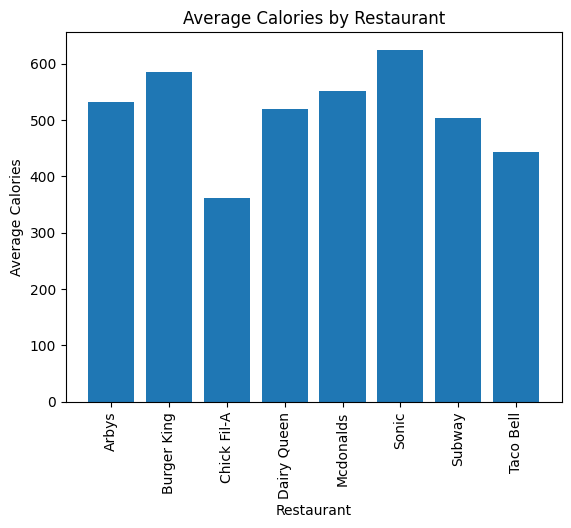

In [14]:
#Grouped data by restaurant and then found the average of the calories column for each restaurant.
df_average_calories = df_nooutlier.groupby('restaurant')['calories'].mean().round(2)


# Plot a bar chart
plt.bar(df_average_calories.index, df_average_calories.values)

# Graph Labeling
plt.title('Average Calories by Restaurant')
plt.xlabel('Restaurant')
plt.ylabel('Average Calories')
plt.xticks(rotation=90)



plt.show()

The bar graph above takes the averages for the calories column and lets us view these values side by side for a better picture of where each restaurant falls with its avereage calories among its items. The bar graph helps better show how much higher the average for calories for Sonic items are compared to Chic Fil-A. Sonic's calorie average is at 624 calories. Chif Fil A is much lower at around the 361 mark for average calories. Chic Fil A's lower calorie count makes it a slight outlier among the other restaurants when looking at this bar graph. Taco Bell is also slightly lower than the others with an average of 443 calories. All the other fast food chain's have averages that are over 500 calories.

In [ ]:
#created a df that contains calories and protein. Will be used to create scatter plot.
df_scatter_protein = df_nooutlier[['calories', 'protein']]
print(df_scatter_protein)

     calories  protein
0         380     37.0
1         840     46.0
2        1130     70.0
3         750     55.0
4         920     46.0
..        ...      ...
510       780     23.0
511       580     23.0
512       780     26.0
513       720     32.0
514       720     28.0

[505 rows x 2 columns]


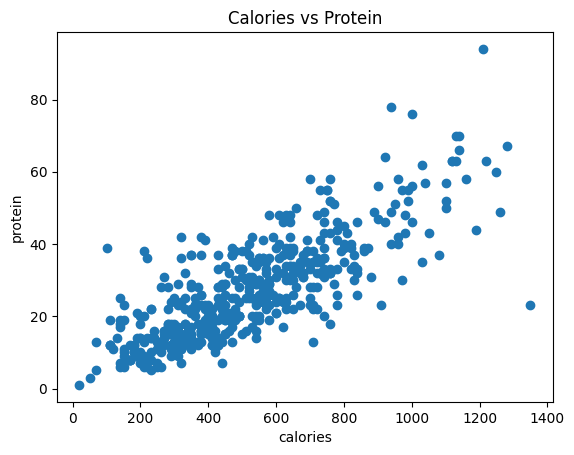

In [ ]:
#Created a scatter plot to examine relationship of variables in df_scatter_protein
plt.scatter(df_scatter_protein.iloc[:,0], df_scatter_protein.iloc[:,1])
plt.title('Calories vs Protein')
plt.xlabel('calories')
plt.ylabel('protein')
plt.show()

This scatter plot show that there is a positive correlation between calories and protein content for these menu items. As the calories fro these items increase, the protein content does as well. The correlation seems to weaken and be more sparatic around the 900 calorie mark though.

In [ ]:
#created a df that contains calories and sodium. Will be used to create scatter plot.
df_scatter_sodium = df_nooutlier[['calories', 'sodium']]
print(df_scatter_sodium)

     calories  sodium
0         380    1110
1         840    1580
2        1130    1920
3         750    1940
4         920    1980
..        ...     ...
510       780    1850
511       580    1270
512       780    1340
513       720    1260
514       720    1340

[505 rows x 2 columns]


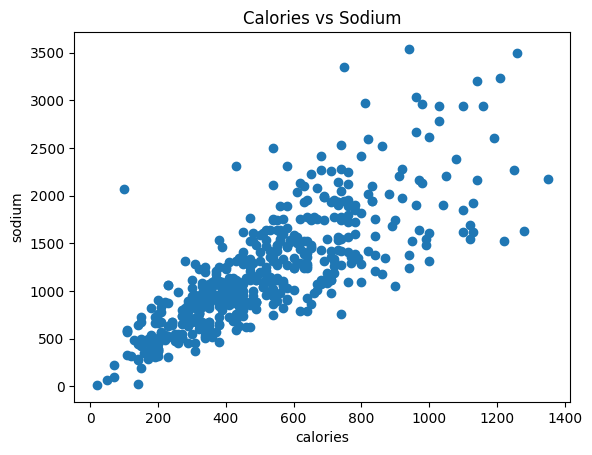

In [ ]:
#Created a scatter plot to examine relationship of variables in df_scatter_sodium
plt.scatter(df_scatter_protein.iloc[:,0], df_scatter_sodium.iloc[:,1])
plt.title('Calories vs Sodium')
plt.xlabel('calories')
plt.ylabel('sodium')
plt.show()

This graph shows a positive correlation between calories and sodium levels. As the calories in a menu item increase, the sodium level of the item increases as well.

Summary and Findings of My Data:
By cleaning up, working through, and creating ways to vizualize my data, I have found that there are restaurants that offer more low calorie, and higher protien options. I also realized that the average sodium content for all of these reaurants is much higher than expected. I thought that places like Chic Fil-A with a lower average of calories and higher end average for protein would have lower sodium content. An aspect that could benefit from further research, would be for me to really break things down by menu item or creating catagories of types of items. I would like to better understand what is bringing Arby's sodium level so much higher than the other restaurants when it isn't one of the highest calorie average places. Better understanding nutrtion to live a healthy life is something that many people consider. Looking at just 3 columns of data for this anylysis raises concern because many people are watching their calories or making sure they get enough protein. When people really need to be looking at the nutrtion labels of these restaurants as whole because the sodium averages of all these places are concerning. Another thing to research into futher would be adding back in columns I dropped to better understand how they relate to calorie, protein, and sodium levels. For example, it would be interesting to see how adding back in the fiber and sugar columns would look compared to these other. There could be a relation between the higher sodium levels and suger once I started evaluating the numbers.